In [226]:
# 1. SPLIT DATA INTO CATEGORICAL AND NUMERIC DATA
# 2. FILL NUMERIC NANS THROUGH IMPUTATION
# 3. FILL CATEGORICAL NANS WITH 'NOTHING'
# 4. DETECT LOW-FREQUENCY LEVELS IN CATEGORICAL FEATURES AND BIN THEM UNDER 'OTHER'
# 5. ENCODE EACH CATEGORICAL VARIABLE INTO A SEQUENCE OF BINARY VARIABLES
# 6. MERGE YOUR ENCODED CATEGORICAL DATA WITH YOUR NUMERIC DATA
# 7. REMOVE FEATURES WITH NO VARIATION
# 8. REMOVE PERFECTLY-CORELATED FEATURES
# 9. SCALE YOUR DATA WITH ZERO MEAN AND UNIT VARIANCE
# 10. PERFORM GRID SEARCH AND RFE ON YOUR DATA TO FIND THE OPTIMAL ESTIMATOR FOR YOUR DATA
# 11. TRAIN AND TEST YOUR MODEL ON THE DATA
# 12. RECLEAN, SCALE AND AND ENCODE INCOMING UNLABELED DATA USING SAME STEPS, SCALERS, ETC.
# 13. INPUT YOUR SCALED, CLEANED ENCODED INCOMING DATA INTO YOUR MODEL

In [227]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [228]:
df = pd.read_csv('C:\\Users\\nreitz\\GAdata\\Airbnb\\train_users_2.csv')
df.head(20)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [229]:
#Take a look at the series in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 27.7+ MB


In [230]:
#Take a look at the values in each series
for col in df:
    print col,':', df[col].unique()

id : ['gxn3p5htnn' '820tgsjxq7' '4ft3gnwmtx' ..., '6o3arsjbb4' 'jh95kwisub'
 'nw9fwlyb5f']
date_account_created : ['2010-06-28' '2011-05-25' '2010-09-28' ..., '2014-06-27' '2014-06-29'
 '2014-06-30']
timestamp_first_active : [20090319043255 20090523174809 20090609231247 ..., 20140630235754
 20140630235822 20140630235824]
date_first_booking : [nan '2010-08-02' '2012-09-08' ..., '2015-06-25' '2015-06-29' '2015-06-28']
gender : ['-unknown-' 'MALE' 'FEMALE' 'OTHER']
age : [             nan   3.80000000e+01   5.60000000e+01   4.20000000e+01
   4.10000000e+01   4.60000000e+01   4.70000000e+01   5.00000000e+01
   3.60000000e+01   3.70000000e+01   3.30000000e+01   3.10000000e+01
   2.90000000e+01   3.00000000e+01   4.00000000e+01   2.60000000e+01
   3.20000000e+01   3.50000000e+01   5.90000000e+01   4.90000000e+01
   4.40000000e+01   3.40000000e+01   2.80000000e+01   1.90000000e+01
   5.30000000e+01   5.20000000e+01   3.90000000e+01   5.70000000e+01
   2.50000000e+01   5.40000000e+01   6.90000

In [231]:
""" From Airbnb: There are 12 possible outcomes of the destination country...
'NDF' is different from 'other' because 'other' means there was a booking, but
is to a country not included in the list, while 'NDF' means there wasn't a booking."""

#Replace 'NDF' with 'NO BOOKING'
df.country_destination.replace('NDF', 'NO BOOKING', inplace=True)
df.country_destination.replace('other', 'OTHER', inplace=True)
df.country_destination.unique()

array(['NO BOOKING', 'US', 'OTHER', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT',
       'NL', 'DE', 'AU'], dtype=object)

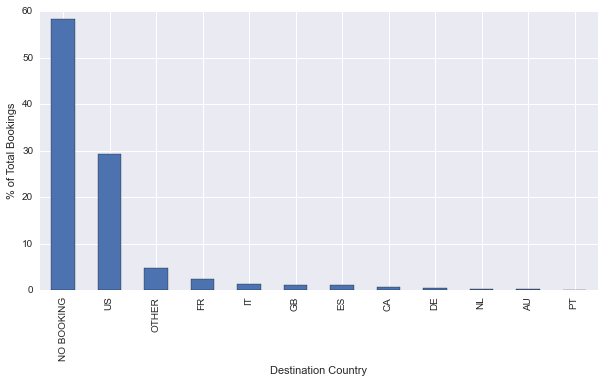

In [232]:
#Plot % bookings by country
destination_percentage = df.country_destination.value_counts() / df.shape[0] * 100
destination_percentage.plot(kind='bar', figsize = (10,5))
plt.xlabel('Destination Country')
plt.ylabel('% of Total Bookings')

#Note that more than half of first-time visitors did not book a trip.

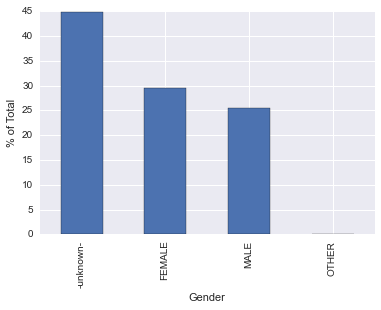

In [233]:
#Do the same for gender.
gender_percentage = df.gender.value_counts() / df.shape[0] * 100
gender_percentage.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('% of Total')

#Nearly half missing data for gender
#Not sure yet if it will be useful to keep missing values the data or clean them out

In [234]:
#Replace '-unknown-' and 'OTHER' gender with 'None' to simplify data.
df.gender.replace('-unknown-', np.nan, inplace=True)
df.gender.replace('OTHER', np.nan, inplace=True)
df.gender.unique()

array([nan, 'MALE', 'FEMALE'], dtype=object)

In [235]:
df.head(5)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NO BOOKING
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NO BOOKING
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,OTHER
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [236]:
#Map gender to 0/1 values
df['gender'] = df.gender.map({'FEMALE':0, 'MALE':1})

In [237]:
#Check out the age var
df.age.describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

In [238]:
#Age-wise, there are clearly users with invalid age data. 
#Recode anyone under 18 or over 99 to NaN (must be 18+ to book on Airbnb)
for age in df.age:
    if age < 18 or age > 98:
        df.age.replace([age], np.nan, inplace=True)
        
df.age.describe()

count    122915.000000
mean         36.553570
std          11.623755
min          18.000000
25%          28.000000
50%          34.000000
75%          42.000000
max          98.000000
Name: age, dtype: float64

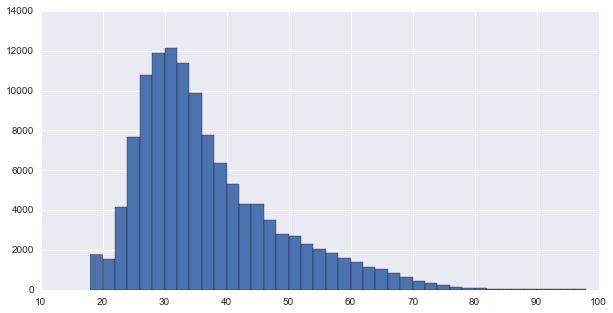

In [239]:
df.age.hist(bins = 40, figsize = (10,5))

In [240]:
df.language.value_counts()
#See language list at https://www.loc.gov/standards/iso639-2/php/code_list.php
#Top languages used: English, Chinese, French, Spanish, Korean, German, Italian, Russian, Portuguese, Japanese, Swedish, Dutch

en    206314
zh      1632
fr      1172
es       915
ko       747
de       732
it       514
ru       389
pt       240
ja       225
sv       122
nl        97
tr        64
da        58
pl        54
cs        32
no        30
el        24
th        24
id        22
hu        18
fi        14
is         5
ca         5
hr         2
Name: language, dtype: int64

In [241]:
#Recode other languages into 'Other'
#Dutch is small, but I kept it because NL is one of the countries in which we want to predict bookings
top_languages = ['en','zh','fr','es','ko','de','it','ru','pt','ja','sv', 'nl']
for lang in df.language:
    if lang not in top_languages:
        df.language.replace([lang], 'other', inplace=True)
        
df.language.value_counts()

en       206314
zh         1632
fr         1172
es          915
ko          747
de          732
it          514
ru          389
other       352
pt          240
ja          225
sv          122
nl           97
Name: language, dtype: int64

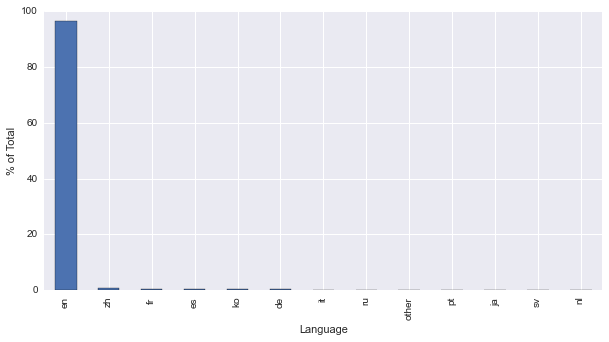

In [242]:
language_percentage = df.language.value_counts() / df.shape[0] * 100
language_percentage.plot(kind='bar', figsize = (10,5))
plt.xlabel('Language')
plt.ylabel('% of Total')
#Almost all booking are done in English

In [243]:
"""country_by_lang = pd.crosstab(df.language, df.country_destination)
country_by_lang.plot(kind='bar', figsize = (10, 20))"""

#df.groupby(['language']).sum().plot(kind='bar', figsize = (10,5))

##COME BACK TO THIS AND DO MORE PLOTTING.

"country_by_lang = pd.crosstab(df.language, df.country_destination)\ncountry_by_lang.plot(kind='bar', figsize = (10, 20))"

In [244]:
dummies_language = pd.get_dummies(df.language, prefix='language')
dummies_language.head(5)

,language_de,language_en,language_es,language_fr,language_it,language_ja,language_ko,language_nl,language_other,language_pt,language_ru,language_sv,language_zh
0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0


In [245]:
### NOTE THAT I DID NOT DROP FIRST DUMMY VAR - TALK TO JON ON WED
#.ix[:, 1:]


#Let's give decision trees a try
df=pd.concat([df, dummies_language], axis=1)
df.head(5)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,language_fr,language_it,language_ja,language_ko,language_nl,language_other,language_pt,language_ru,language_sv,language_zh
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0,en,direct,...,0,0,0,0,0,0,0,0,0,0
1,820tgsjxq7,2011-05-25,20090523174809,NaN,1,38,facebook,0,en,seo,...,0,0,0,0,0,0,0,0,0,0
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,0,56,basic,3,en,direct,...,0,0,0,0,0,0,0,0,0,0
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,0,42,facebook,0,en,direct,...,0,0,0,0,0,0,0,0,0,0
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41,basic,0,en,direct,...,0,0,0,0,0,0,0,0,0,0


In [246]:
df = df.dropna(how='any')

In [247]:
# create a list of feature columns
feature_cols = ['gender', 'age', 'language_en','language_fr','language_es','language_de','language_it','language_pt','language_nl']

# define X and y
X = df[feature_cols]
y = df.country_destination

from sklearn.cross_validation import train_test_split
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print X_train
print y_train
print X_test
print y_test

        gender  age  language_en  language_fr  language_es  language_de  \
56836        0   45            1            0            0            0   
104536       1   95            0            0            0            0   
159773       1   36            1            0            0            0   
73787        0   43            1            0            0            0   
22542        1   29            1            0            0            0   
43596        1   38            1            0            0            0   
20062        0   23            1            0            0            0   
76340        0   58            1            0            0            0   
93609        0   35            1            0            0            0   
34014        1   49            1            0            0            0   
157050       1   27            1            0            0            0   
96102        0   38            1            0            0            0   
52997        1   27      

In [248]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=3, random_state=1)

# Fit model
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=1, splitter='best')

In [249]:
from sklearn.cross_validation import cross_val_score

# How's model with CV?
cross_val_score(dtc, X, y)

array([ 0.70733033,  0.70733696,  0.70767642])

In [250]:
pd.DataFrame({'feature':feature_cols, 'importance':dtc.feature_importances_})

,feature,importance
0,gender,0.326389
1,age,0.631265
2,language_en,0.000000
3,language_fr,0.042346
4,language_es,0.000000
5,language_de,0.000000
6,language_it,0.000000
7,language_pt,0.000000
8,language_nl,0.000000


In [251]:
#Mess around with different features/depths


# create a list of feature columns
feature_cols = ['gender', 'age','language_fr','language_es','language_de','language_it','language_pt','language_nl']

# define X and y
X = df[feature_cols]
y = df.country_destination

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#create classifier
dtc = DecisionTreeClassifier(max_depth=5, random_state=1)

# Fit model
dtc.fit(X_train, y_train)

# How's model with CV?
cross_val_score(dtc, X, y)

array([ 0.70689561,  0.70690217,  0.70735022])

In [ ]:
"""TO DO:
Figure out how to group within bar chart (e.g., destination by gender)
Try adding month of booking in model using datetime tools
Random forests?
Try SVD to deal with NaN?"""
